In [24]:
sequential_time = {
    64: 965.394,
    128: 788.034,
    256: 674.394,
    512: 618.048
}

parallel_time = {
    '2 a100 dp': {
        'gpu_num': 2,
        64: 874.374,
        128: 682.0,
        256: 460.76,
        512: 363.6,
    },
    '2 a100 ddp': {
        'gpu_num': 2,
        64: 896.949,
        128: 744.043,
        256: 680.083,
        512: 657.278,
    },
    '2 a100 fsdp': {
        'gpu_num': 2,
        64: 2098.389,
        128: 1227.384,
        256: 776.372,
        512: 710.373,
    },
    '4 a100 dp': {
        'gpu_num': 4,
        64: 1693.874,
        128: 811.382,
        256: 436.037,
        512: 276.498,
    },
    '4 a100 ddp': {
        'gpu_num': 4,
        64: 598.384,
        128: 487.802,
        256: 450.201,
        512: 443.023,
    },
    '4 a100 fsdp': {
        'gpu_num': 4,
        64: 1280.383,
        128: 877.287,
        256: 569.483,
        512: 489.384,
    },
    '8 a100 dp': {
        'gpu_num': 8,
        64: 2681.382,
        128: 1322.384,
        256: 673.282,
        512: 339.242,
    },
    '8 a100 ddp': {
        'gpu_num': 8,
        64: 570.473,
        128: 471.384,
        256: 438.392,
        512: 431.234,
    },
    '8 a100 fsdp': {
        'gpu_num': 8,
        64: 1021.382,
        128: 677.387,
        256: 529.384,
        512: 599.483,
    },
}

In [25]:


colors = {
    '2 a100 dp': (1.0, 0.5, 0.5),
    '2 a100 ddp': (0.8, 0.2, 0.2),
    '2 a100 fsdp': (0.6, 0.0, 0.0),
    '4 a100 dp': (0.5, 0.7, 1.0),
    '4 a100 ddp': (0.2, 0.5, 0.8),
    '4 a100 fsdp': (0.0, 0.3, 0.6),
    '8 a100 dp': (0.5, 1.0, 0.5),
    '8 a100 ddp': (0.2, 0.8, 0.2),
    '8 a100 fsdp': (0.0, 0.6, 0.0)
}

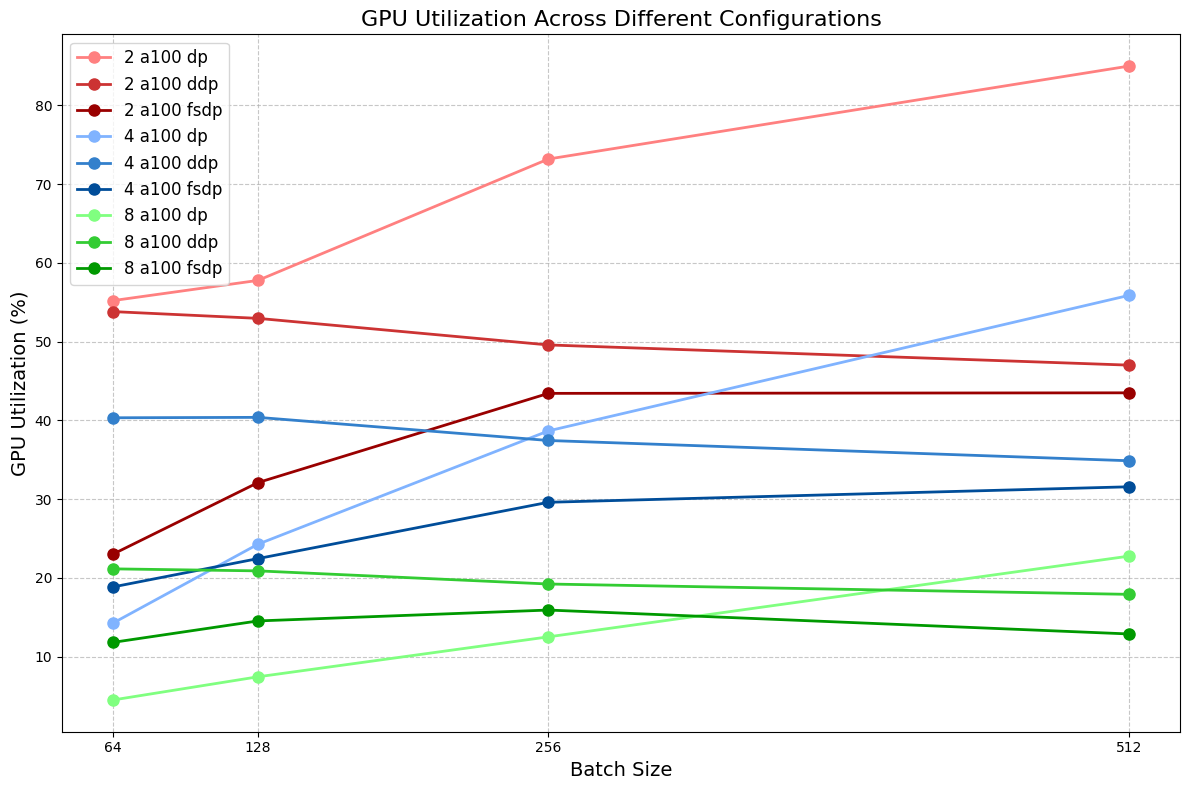

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Batch sizes
batch_sizes = [64, 128, 256, 512]


utilizations = {}
for config, data in parallel_time.items():
    gpu_num = data['gpu_num']
    utilizations[config] = []
    
    for batch_size in batch_sizes:
        # Calculate GPU utilization
        sequential = sequential_time[batch_size]
        parallel = data[batch_size]
        utilization = sequential / (parallel * gpu_num)
        utilizations[config].append(utilization * 100)

plt.figure(figsize=(12, 8))

line_styles = ['-', '--']

for config in utilizations.keys():
    gpu_count = parallel_time[config]['gpu_num']
    style = line_styles[0] if 'dp' in config else line_styles[1]
    
    plt.plot(batch_sizes, utilizations[config], 
             label=f'{config}', 
             linestyle=style, marker='o', linewidth=2, markersize=8, 
             color=colors[config])

plt.xlabel('Batch Size', fontsize=14)
plt.ylabel('GPU Utilization (%)', fontsize=14)
plt.title('GPU Utilization Across Different Configurations', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.xticks(batch_sizes)
plt.tight_layout()

plt.savefig('gpu_utilization.png', dpi=300, bbox_inches='tight')
plt.show()


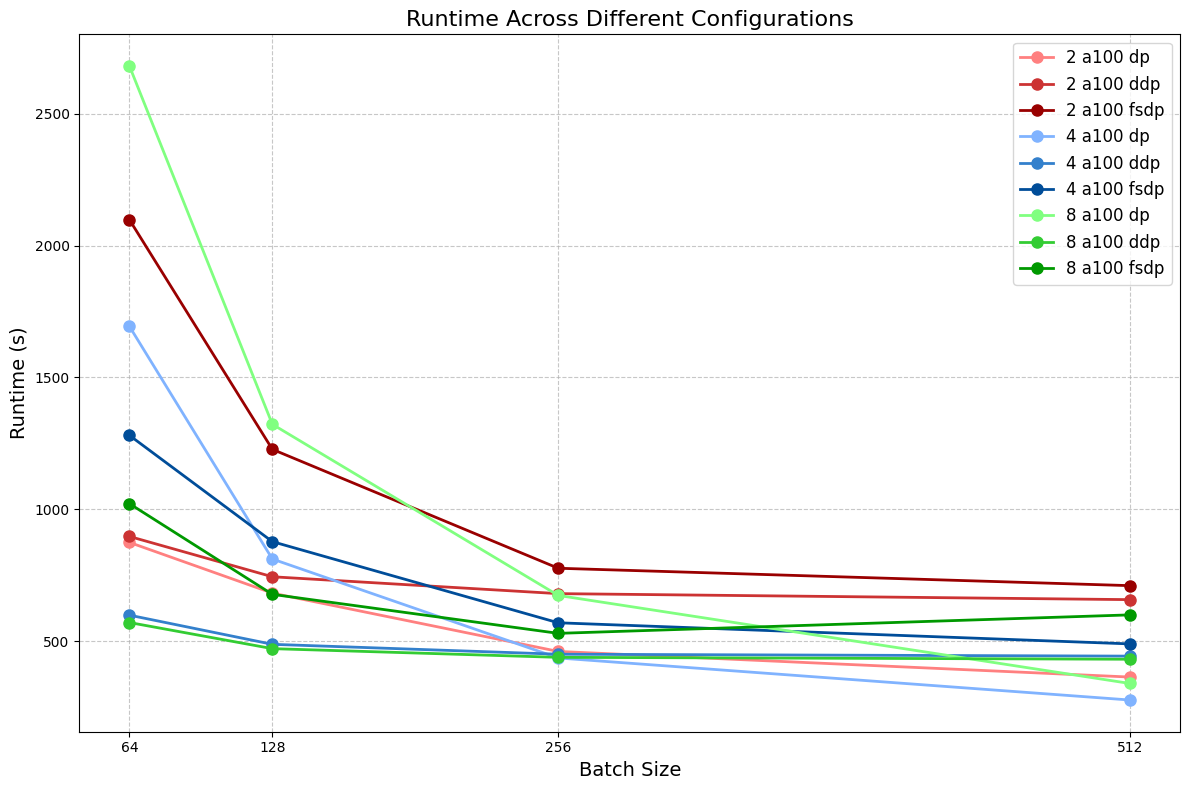

In [27]:
# Plot the runtime for each configuration with batch size on the x-axis and runtime on the y-axis

plt.figure(figsize=(12, 8))

for config, data in parallel_time.items():
    runtimes = [data[batch_size] for batch_size in batch_sizes]
    plt.plot(batch_sizes, runtimes, 
             label=f'{config}', 
             linestyle='-', marker='o', linewidth=2, markersize=8, 
             color=colors[config])

plt.xlabel('Batch Size', fontsize=14)
plt.ylabel('Runtime (s)', fontsize=14)
plt.title('Runtime Across Different Configurations', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.xticks(batch_sizes)
plt.tight_layout()

plt.savefig('runtime_across_configurations.png', dpi=300, bbox_inches='tight')
plt.show()
